# <font color="darkblue"> Prática 03: RCO - AUC</font>

**Objetivos:**


*   Apresentar  o gráfico ROC
*   E como computar a área AUC (abaixo da curva ROC)

**Requisitos de execução:**


*   Upload do arquivo *heart_failure_clinical_records_dataset.csv*

**Atividade 1:**

1. Visitar a base de dados: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2. Carregar os dados do arquivo *heart_failure_clinical_records_dataset.csv* utilizando o pandas.

    

In [ ]:
import pandas as pd
import numpy as np

heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Features = ['time', 'anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','serum_creatinine','age', 'high_blood_pressure', 'platelets', 'serum_sodium', 'sex', 'smoking']
x = heart_data[Features].values
y = heart_data["DEATH_EVENT"].values

print("d: " + str(len(Features)))
print("N: " + str(len(y)))


**Atividade 3:**

1. Separar os dados em conjunto de treinamento e teste
2. Aplicar a padronização nos dados


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_T, x_test, y_T, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

sc1 = StandardScaler()
sc1.fit(x_T)
x_test = sc1.transform(x_test)
x_T = sc1.transform(x_T)

print("Tamanho treinamento: " + str(len(x_T)))
print("Tamanho teste: " + str(len(x_test)))

**Atividade 4:**

1. Aplique os dados de treinamento na classe LogisticRegression do pacote *sklearn.metrics*;
2. Compute as métricas de classificação com os dados de teste.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_T, y_T)

print(classification_report(y_test, logistic.predict(x_test)))

**Atividade 5:**

1. Aplique os dados de treinamento na classe LinearRegression do pacote *sklearn.metrics*. O y de entrada deve ser convertido para os valores {-1,+1};
2. Compute as métricas de classificação com os dados de teste.

In [ ]:
from sklearn.linear_model import LinearRegression

r_T = [-1 if y==0 else +1 for y in y_T]
r_test = [-1 if y==0 else +1 for y in y_test]

linear = LinearRegression()
linear.fit(x_T, r_T)

y_pred = [np.sign(y) for y in linear.predict(x_test)]
print(classification_report(r_test, y_pred))

**Atividade 6:**

1. Plote o gráfico ROC das duas funções hipoteses computadas anteriormente com o auxílio da função *roc_curve* do pacote *sklearn.metrics*;
2. Compute a área AUC com o auxílio da função *roc_auc_score* do memso pacote.

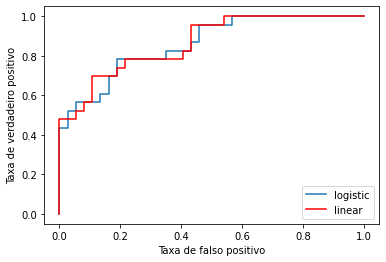

Logistic AUC:0.8601645123384254
Linear AUC:0.8648648648648649


In [41]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, label='logistic')

fpr, tpr, thresholds = roc_curve(y_test, linear.predict(x_test))
plt.plot(fpr, tpr, color='r',  label='linear')

plt.xlabel("Taxa de falso positivo")
plt.ylabel("Taxa de verdadeiro positivo")
plt.legend(loc='lower right')

plt.show()

print("Logistic AUC:" + str(roc_auc_score(y_test, logistic.predict_proba(x_test)[:, 1])))
print("Linear AUC:" + str(roc_auc_score(y_test, linear.predict(x_test))) )